#### Day 2


Linear regression - the hammer of the statistics world. Eventually, I will show how to perform least squares with singular value decomposition but for now, we will use 1-2 different packages. For linear regression, the basic model is something like: 

$$ y = \beta_0 + \beta_1 \cdot x$$

where y is your response variable. $\beta_0$ is your y-intercept. $x$ is your predictor. $\beta_1$ is your predictor weight.

Generally, there are a few assumptions we make. First, there is no multi-collinearity. Secondly, there is homoscedascity. Third, the data is randomly selected.

In [33]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [9]:
data = np.random.rand(100,4)

In [10]:
x = data[:,:3]
y = data[:,3]

In [12]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = test_size )

In [18]:
reg = LinearRegression().fit(X_train, y_train)

#### Calculating MSE in two ways

In [26]:
y_pred = reg.predict(X_test)

mse = (sum((y_pred - y_test)**2))/20

mse2 = mean_squared_error(y_test, y_pred)

In [28]:
mse

0.08552940287938245

In [31]:
mse2

0.08552940287938245

#### Assumptions

#### Randomness of samples
Okay. This one was pretty pretty easy. We are acutally expecting to get a poor result back because the numbers are randomly generated

#### Correlation

Correlation below tells us that there is not a strong correlation among the different variables which is good.

#### Homoscedasticity

Graphically, I would say we passed the test. However, when applying the Goldfeld Quandt test, 

In [17]:
pd.DataFrame(data).corr()

,0,1,2,3
0,1.000000,0.020645,0.129307,0.183729
1,0.020645,1.000000,0.010496,-0.099512
2,0.129307,0.010496,1.000000,-0.146503
3,0.183729,-0.099512,-0.146503,1.000000


In [37]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

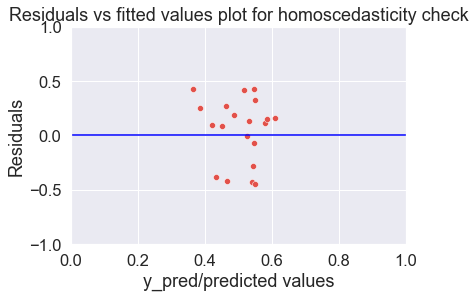

In [39]:
residuals = y_test -y_pred
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,1)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [41]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 0.7037844831450488), ('p-value', 0.6726894821042759)]